In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
image = cv2.imread("car.jpg")

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [60]:
edges = cv2.Canny(gray, threshold1=60, threshold2=200)
cv2.imwrite("edges.jpg", edges)

True

In [31]:
# save the image
cv2.imwrite("edges.jpg", edges)

True

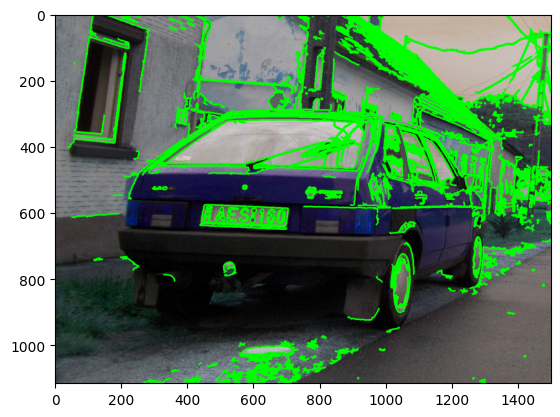

In [6]:
edges = cv2.Canny(gray, threshold1=60, threshold2=250)
contours, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
img1 = image.copy()
cv2.drawContours(img1, contours, -1, (0, 255, 0), 3)
plt.imshow(img1)

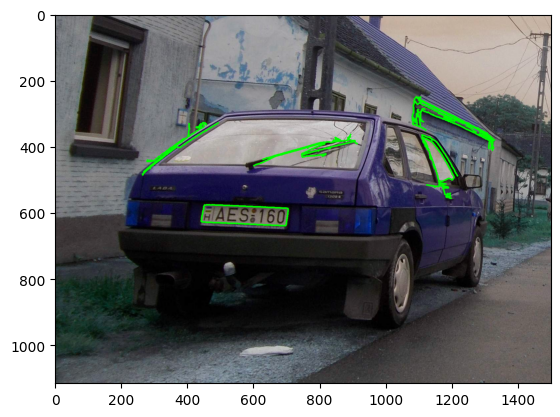

In [21]:
# filter for contours with 4 corners
filtered_contours = []
for contour in contours:
    if len(cv2.approxPolyDP(contour, 0.05 * cv2.arcLength(contour, True), False)) == 3:
        filtered_contours.append(contour)

# sort contours by arc length, keep largest 30
arc = lambda cnt: cv2.arcLength(cnt, False)
filtered_contours = sorted(filtered_contours, key=arc, reverse=True)[:5]

img2 = image.copy()
cv2.drawContours(img2, filtered_contours, -1, (0, 255, 0), 3)
plt.imshow(img2)

In [20]:
len(filtered_contours[4])

247